In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Fetching the data from yahoo finance
from pandas_datareader.data import DataReader  # To read stock data
import yfinance as yf  # Yahoo Finance API
from pandas_datareader import data as pdr

yf.pdr_override()
from datetime import datetime

In [2]:
#List of top Indian stocks for analysis
indian_stocks = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS', 'INFY.NS']

#Defining the time period for data retrieval
end_date = datetime.now()
start_date = datetime(end_date.year - 1, end_date.month, end_date.day)

#Creating a dictionary to store stock data
stock_data_dict = {}

#Retrieving stock data for the specified Indian stocks
for stock_symbol in indian_stocks:
    stock_data_dict[stock_symbol] = yf.download(stock_symbol, start_date, end_date)

#Defining company names for the stocks
company_names = ["Reliance Industries", "Tata Consultancy Services", "HDFC Bank", "Infosys"]

#Assigning company names to the stock data
for stock_symbol, company_name in zip(stock_data_dict.keys(), company_names):
    stock_data_dict[stock_symbol]["Company Name"] = company_name

indian_stock_df = pd.concat(stock_data_dict.values(), axis=0)
indian_stock_df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Company Name
Date,,,,,,,
2023-09-29,1432.099976,1446.800049,1416.000000,1435.449951,1435.449951,6068968,Infosys
2023-10-03,1436.050049,1437.000000,1420.300049,1434.000000,1434.000000,4181867,Infosys
2023-10-04,1425.000000,1449.949951,1418.199951,1444.349976,1444.349976,4510406,Infosys
2023-10-05,1452.000000,1475.650024,1450.199951,1463.449951,1463.449951,7384621,Infosys
2023-10-06,1469.500000,1484.500000,1463.300049,1478.699951,1478.699951,3598672,Infosys
2023-10-09,1464.900024,1491.000000,1462.199951,1475.449951,1475.449951,3567552,Infosys
2023-10-10,1483.900024,1497.000000,1469.099976,1495.150024,1495.150024,5688951,Infosys
2023-10-11,1497.000000,1518.250000,1481.449951,1494.400024,1494.400024,7220129,Infosys
2023-10-12,1491.900024,1504.400024,1452.000000,1465.500000,1465.500000,11081662,Infosys


In [3]:
indian_stock_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 992 entries, 2022-10-14 to 2023-10-13
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          992 non-null    float64
 1   High          992 non-null    float64
 2   Low           992 non-null    float64
 3   Close         992 non-null    float64
 4   Adj Close     992 non-null    float64
 5   Volume        992 non-null    int64  
 6   Company Name  992 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 62.0+ KB


In [4]:
indian_stock_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,992.000000,992.000000,992.000000,992.000000,992.000000,9.920000e+02
mean,2214.926409,2231.303222,2196.716286,2214.451464,2193.956346,7.068657e+06
std,763.728476,769.617700,757.746871,764.323840,758.264207,7.038863e+06
min,1225.949951,1230.000000,1185.300049,1223.400024,1191.149658,0.000000e+00
25%,1561.125000,1575.000000,1546.987488,1561.787537,1535.388702,2.890625e+06
50%,1969.224976,1988.750000,1946.900024,1964.724976,1960.850708,5.121530e+06
75%,2890.662476,2920.250000,2865.312500,2903.787598,2873.787476,8.482889e+06
max,3650.000000,3679.000000,3631.000000,3638.350098,3638.350098,8.670560e+07


In [5]:
indian_stock_df[indian_stock_df["Company Name"] == "Tata Consultancy Services"].describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,3334.111090,3358.894548,3307.849606,3335.150200,3295.860907,1.855761e+06
std,127.024603,129.278717,127.515654,129.486599,147.642297,9.052966e+05
min,3072.649902,3113.000000,3070.250000,3089.600098,2999.609863,0.000000e+00
25%,3230.825073,3261.287415,3210.000000,3233.349976,3185.433044,1.325038e+06
50%,3322.750000,3349.250000,3297.775024,3323.449951,3268.157715,1.656054e+06
75%,3420.250000,3446.549927,3395.775024,3426.762451,3399.584106,2.071155e+06
max,3650.000000,3679.000000,3631.000000,3638.350098,3638.350098,6.739966e+06


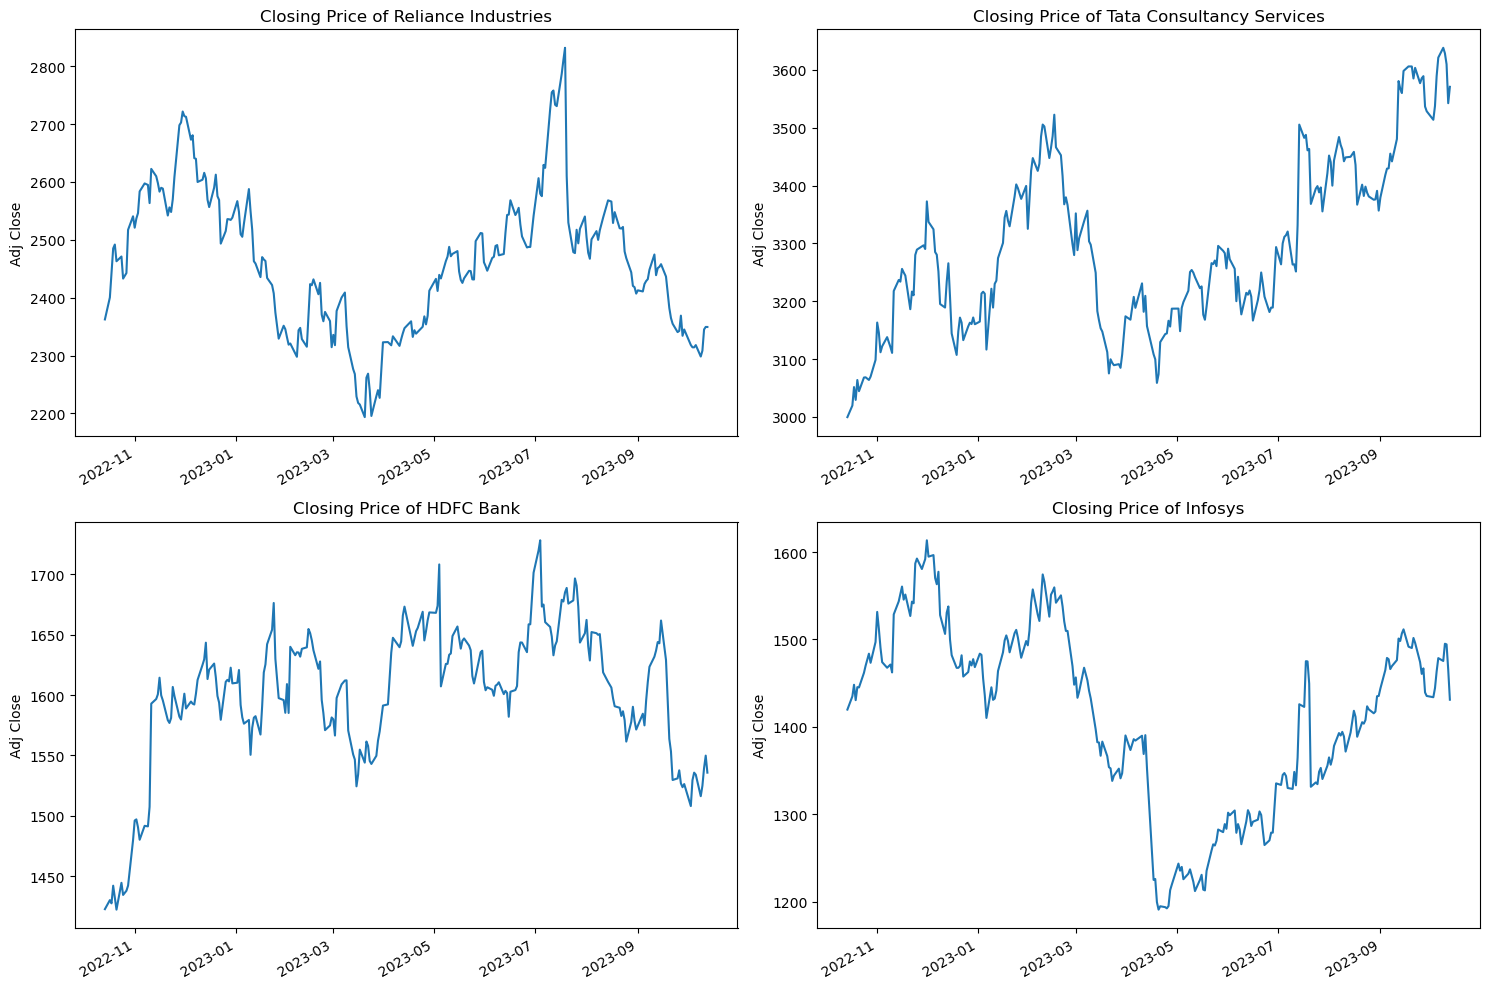

In [6]:
#Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, stock_symbol in enumerate(indian_stocks, 1):
    plt.subplot(2, 2, i)
    stock_data_dict[stock_symbol]['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_names[i - 1]}")
    
plt.tight_layout()

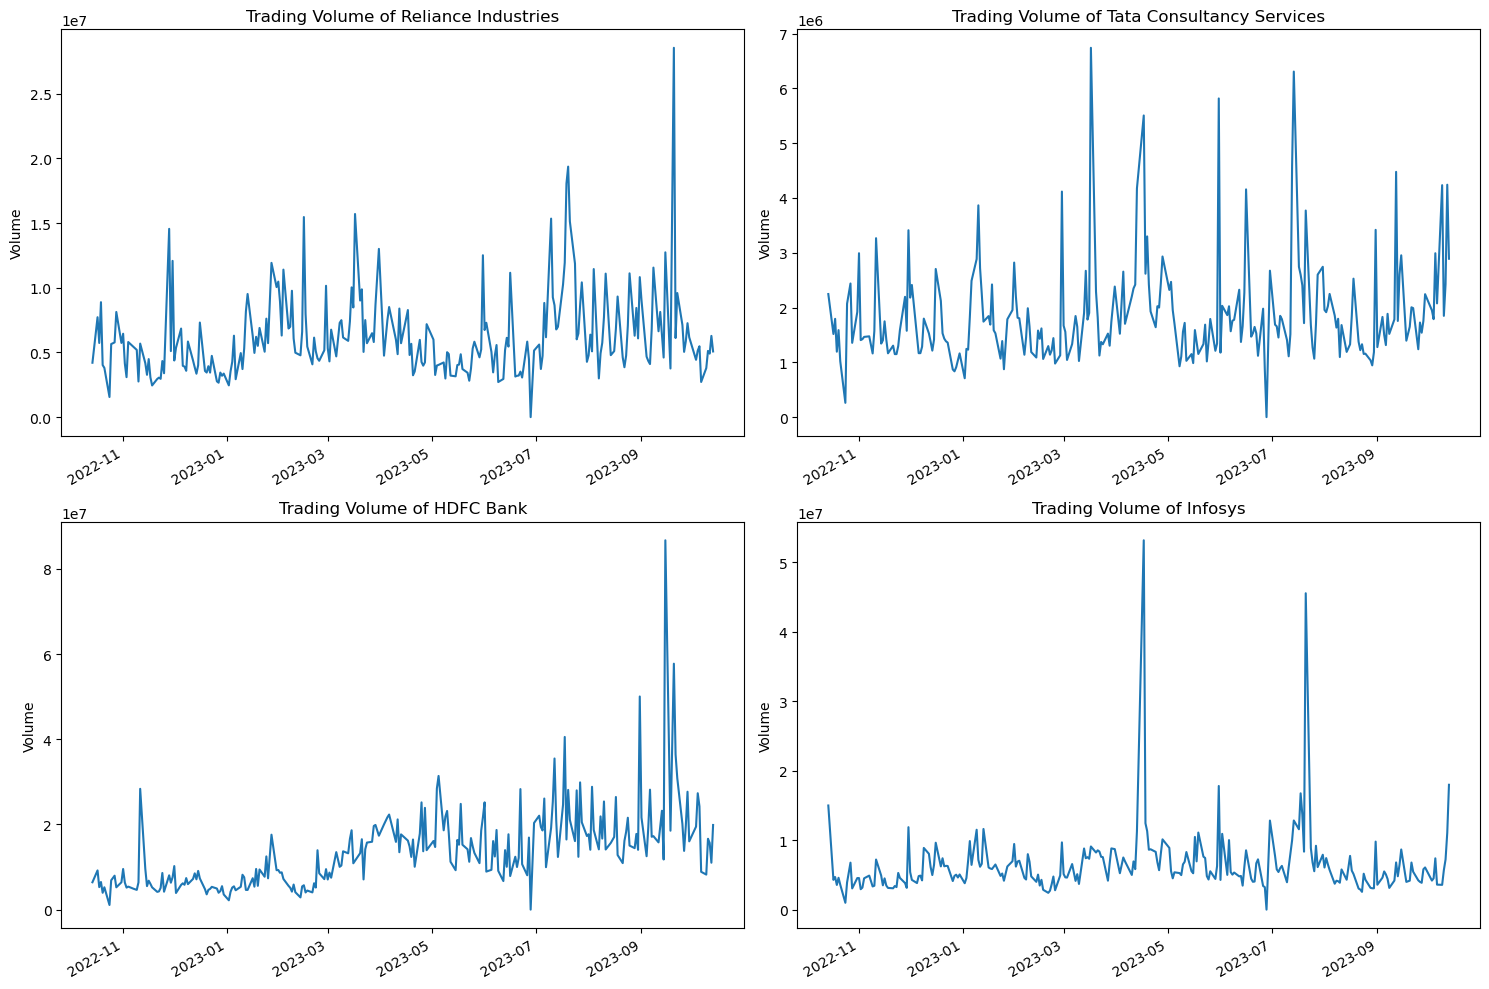

In [7]:
#subplots for trading volume
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, stock_symbol in enumerate(indian_stocks, 1):
    plt.subplot(2, 2, i)
    stock_data_dict[stock_symbol]['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Trading Volume of {company_names[i - 1]}")
    
plt.tight_layout()

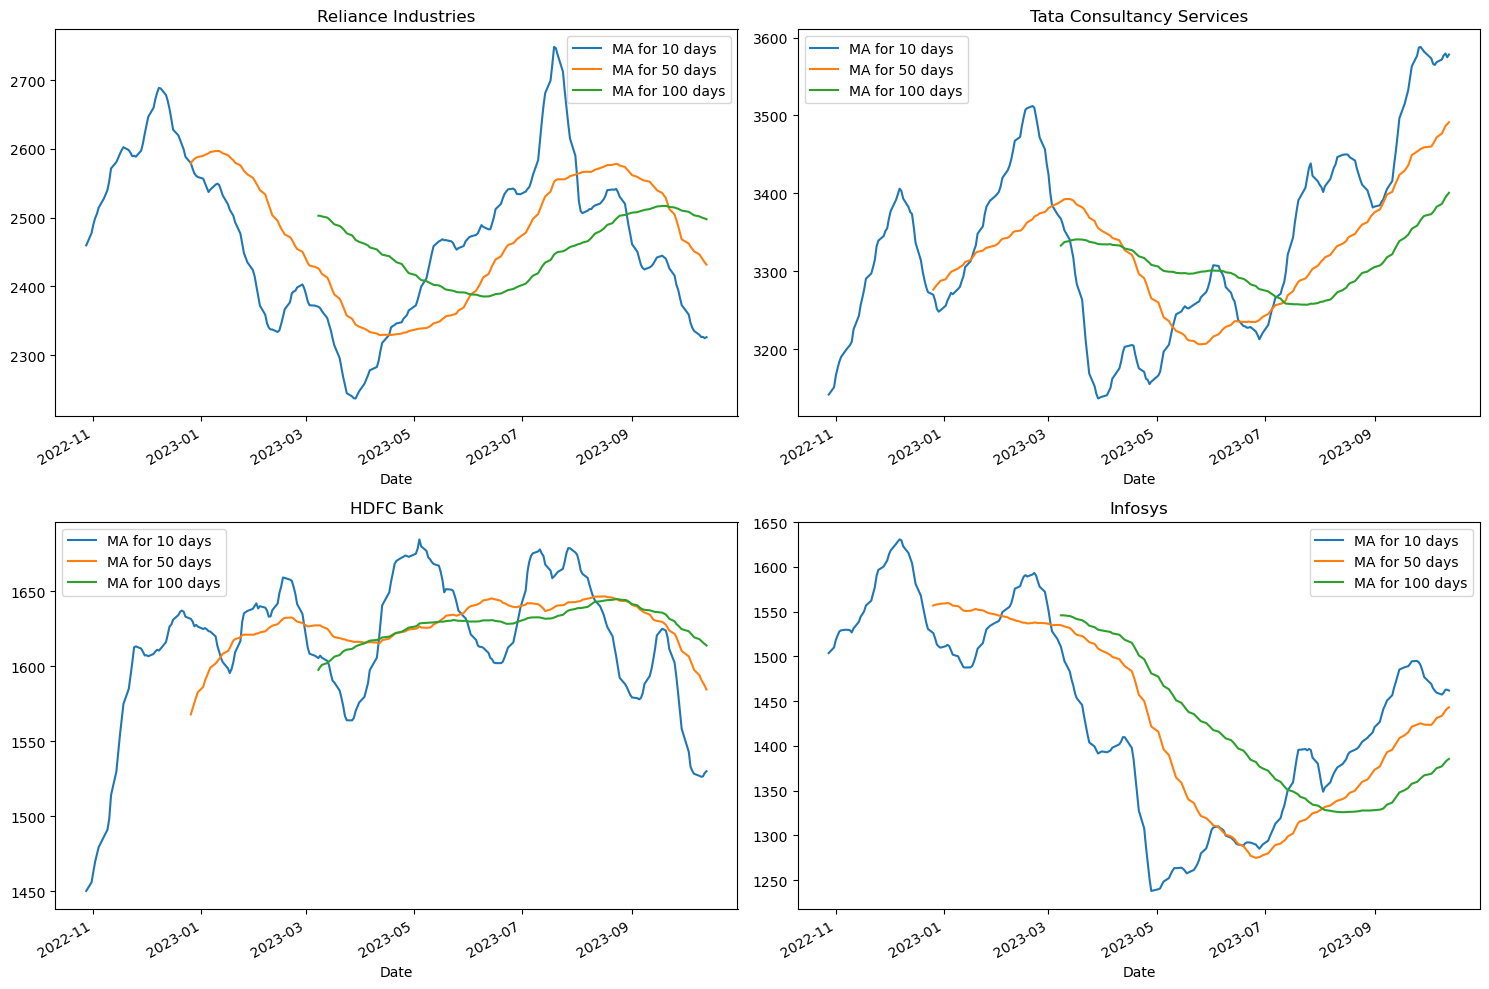

In [8]:
#subplots for moving averages (10 days, 50 days, and 100 days)
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

ma_days = [10, 50, 100]

for i, stock_symbol in enumerate(indian_stocks, 1):
    for ma_day in ma_days:
        column_name = f"MA for {ma_day} days"
        stock_data_dict[stock_symbol][column_name] = stock_data_dict[stock_symbol]['Close'].rolling(ma_day).mean()
    
    stock_data_dict[stock_symbol][[f"MA for {ma_day} days" for ma_day in ma_days]].plot(ax=axes[(i - 1) // 2, (i - 1) % 2])
    axes[(i - 1) // 2, (i - 1) % 2].set_title(company_names[i - 1])

fig.tight_layout()
plt.show()


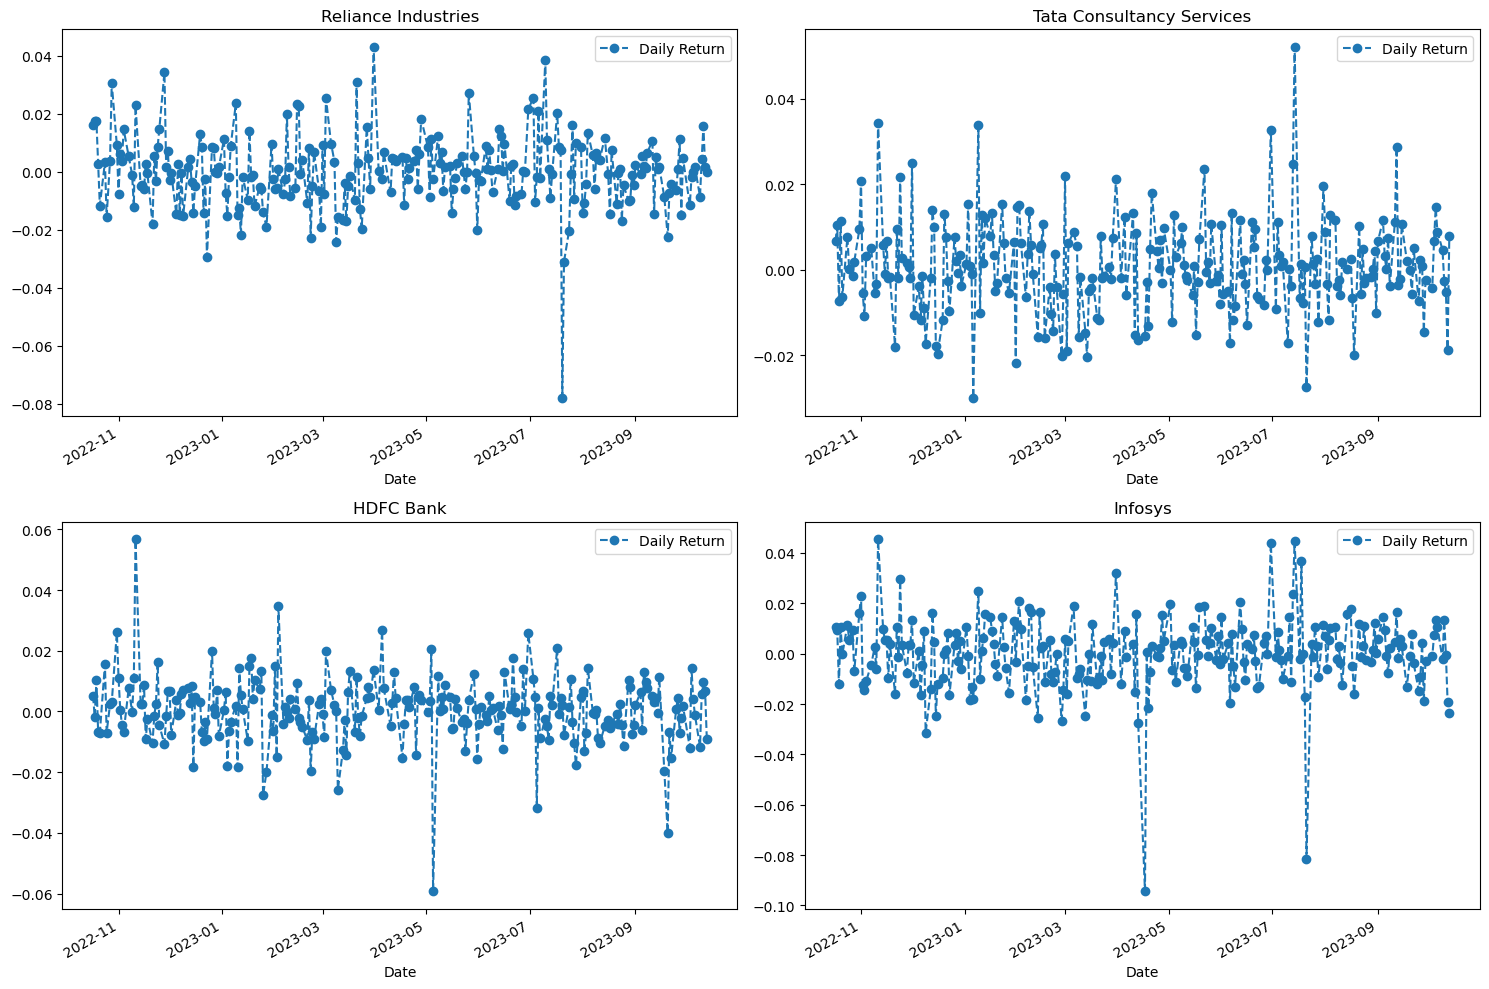

In [9]:
#daily returns for Indian stocks
for stock_symbol in indian_stocks:
    stock_data_dict[stock_symbol]['Daily Return'] = stock_data_dict[stock_symbol]['Adj Close'].pct_change()

#subplots for daily returns
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

for i, stock_symbol in enumerate(indian_stocks, 1):
    stock_data_dict[stock_symbol]['Daily Return'].plot(ax=axes[(i - 1) // 2, (i - 1) % 2], legend=True, linestyle='--', marker='o')
    axes[(i - 1) // 2, (i - 1) % 2].set_title(company_names[i - 1])

fig.tight_layout()
plt.show()


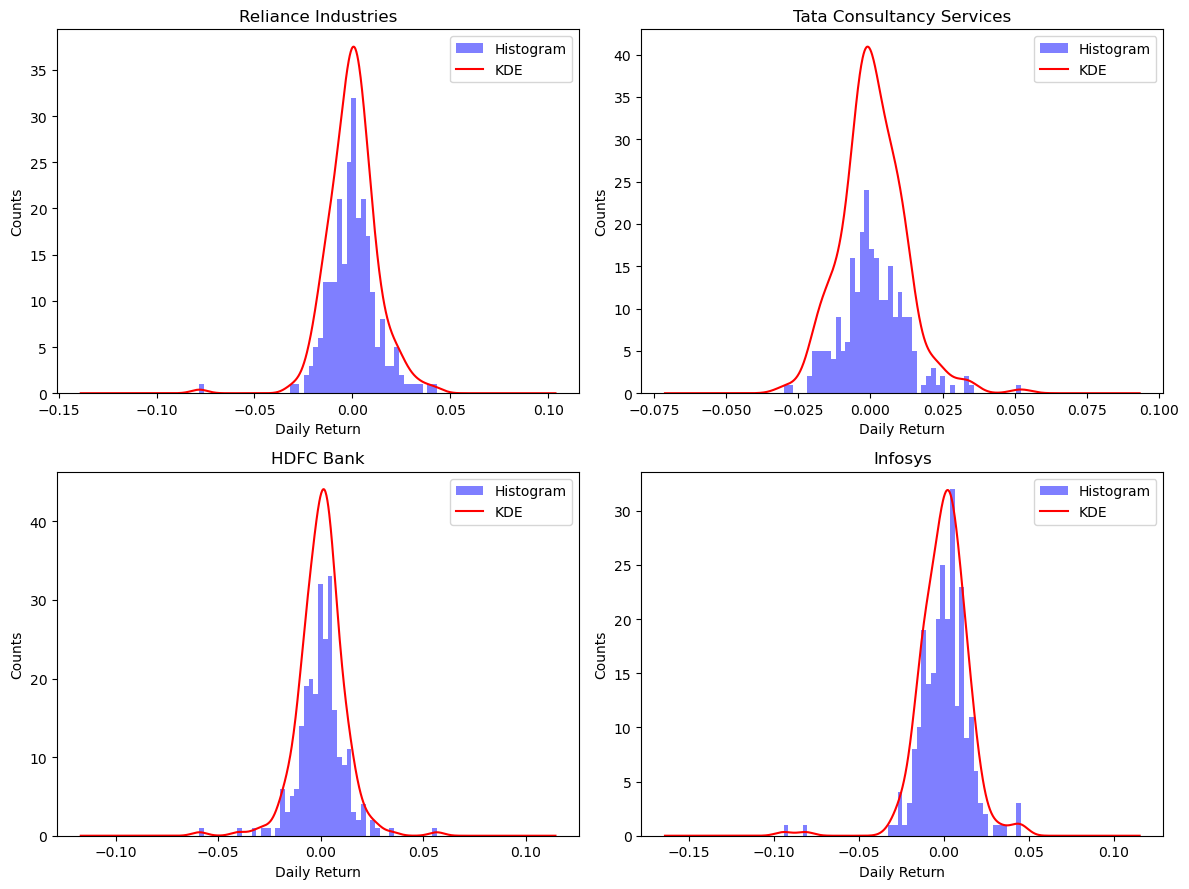

In [10]:
plt.figure(figsize=(12, 9))

for i, stock_symbol in enumerate(indian_stocks, 1):
    plt.subplot(2, 2, i)
    stock_data_dict[stock_symbol]['Daily Return'].hist(bins=50, alpha=0.5, label='Histogram', color='blue')
    stock_data_dict[stock_symbol]['Daily Return'].plot(kind='kde', label='KDE', color='red')
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_names[i - 1]}')
    plt.legend()

plt.tight_layout()
plt.show()

In [11]:
#DataFrame with the 'Close' columns for each stock and then calculating 
#correlation matrix
closing_prices_df = pd.DataFrame()

for stock_symbol in indian_stocks:
    closing_prices_df[stock_symbol] = stock_data_dict[stock_symbol]['Close']

correlation_matrix = closing_prices_df.corr()
print(correlation_matrix)


             RELIANCE.NS    TCS.NS  HDFCBANK.NS   INFY.NS
RELIANCE.NS     1.000000  0.021101     0.197204  0.127604
TCS.NS          0.021101  1.000000     0.087975  0.416823
HDFCBANK.NS     0.197204  0.087975     1.000000 -0.273785
INFY.NS         0.127604  0.416823    -0.273785  1.000000


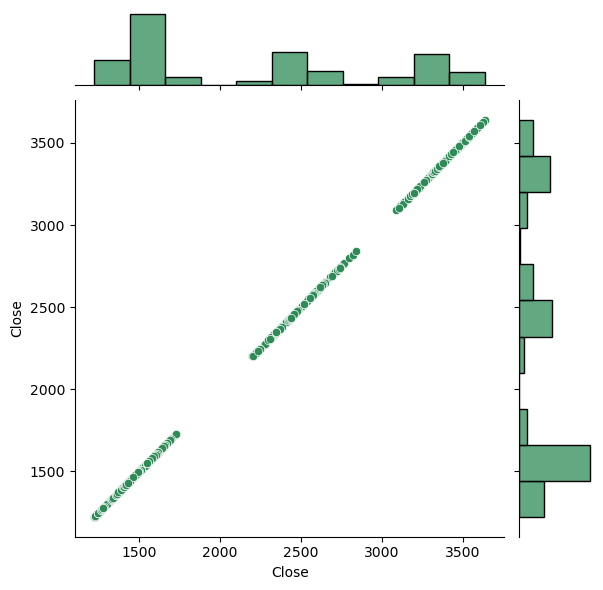

In [12]:
tcs_df = indian_stock_df['Close']  

#scatter plot to compare TCS's daily return to itself
sns.jointplot(x=tcs_df, y=tcs_df, kind='scatter', color='seagreen')

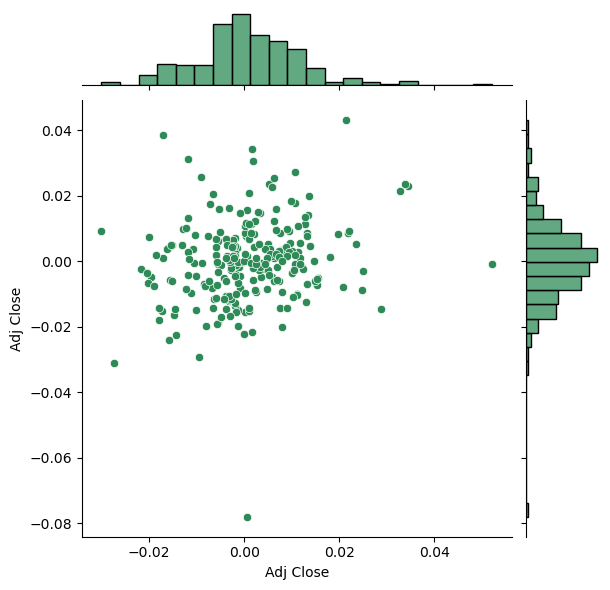

In [13]:
#daily returns for TCS and Reliance
tcs_df = indian_stock_df[indian_stock_df['Company Name'] == 'Tata Consultancy Services']['Adj Close'].pct_change()
reliance_df = indian_stock_df[indian_stock_df['Company Name'] == 'Reliance Industries']['Adj Close'].pct_change()

#jointplot to compare the daily returns of TCS and Reliance
sns.jointplot(x=tcs_df, y=reliance_df, kind='scatter', color='seagreen')
plt.show()

In [14]:
print(indian_stock_df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Company Name'], dtype='object')


C:\Users\piyus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


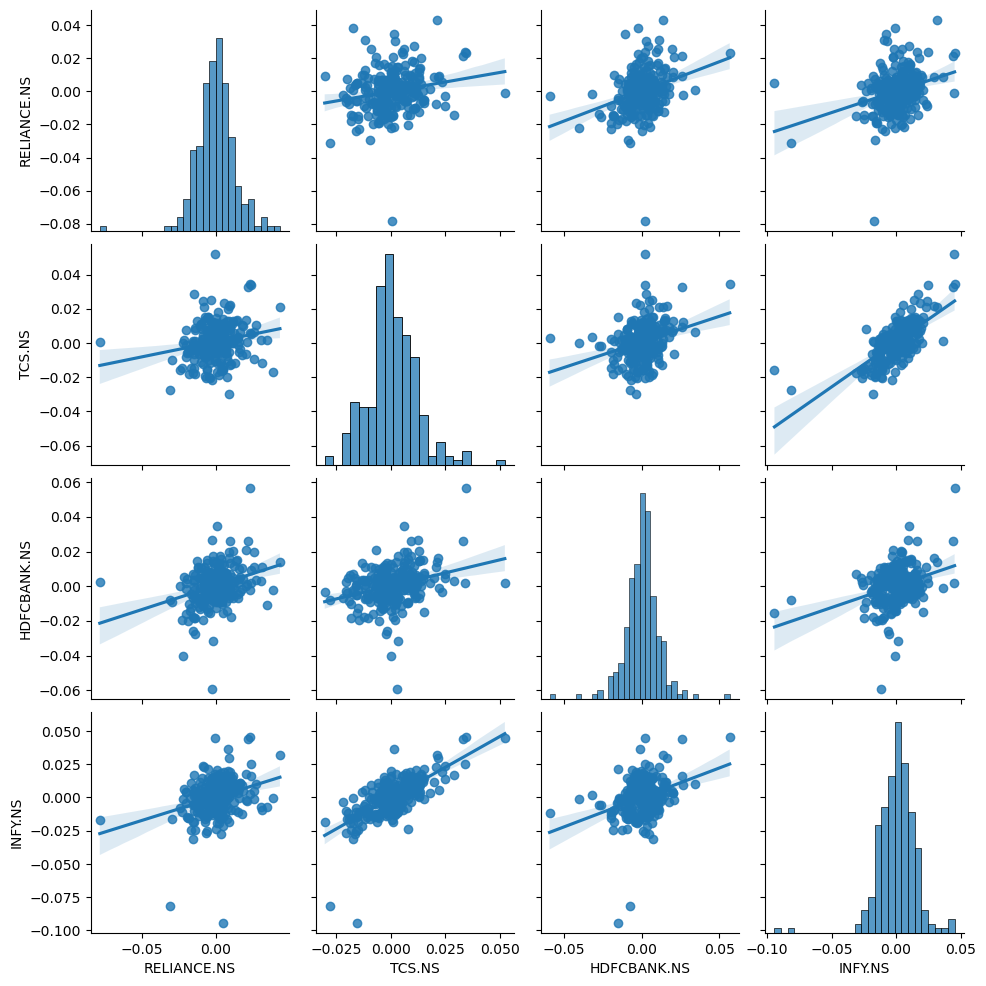

In [15]:
#daily returns for Indian stocks
for stock_symbol in indian_stocks:
    stock_data_dict[stock_symbol]['Daily Return'] = stock_data_dict[stock_symbol]['Adj Close'].pct_change()

tech_rets = pd.concat([stock_data_dict[stock_symbol]['Daily Return'] for stock_symbol in indian_stocks], axis=1)
tech_rets.columns = indian_stocks

#pairplot to visualize correlations
sns.pairplot(tech_rets, kind='reg')
plt.show()


C:\Users\piyus\AppData\Local\Temp\ipykernel_9976\369262728.py:6: UserWarning: The figure layout has changed to tight
  pair_grid.fig.tight_layout()


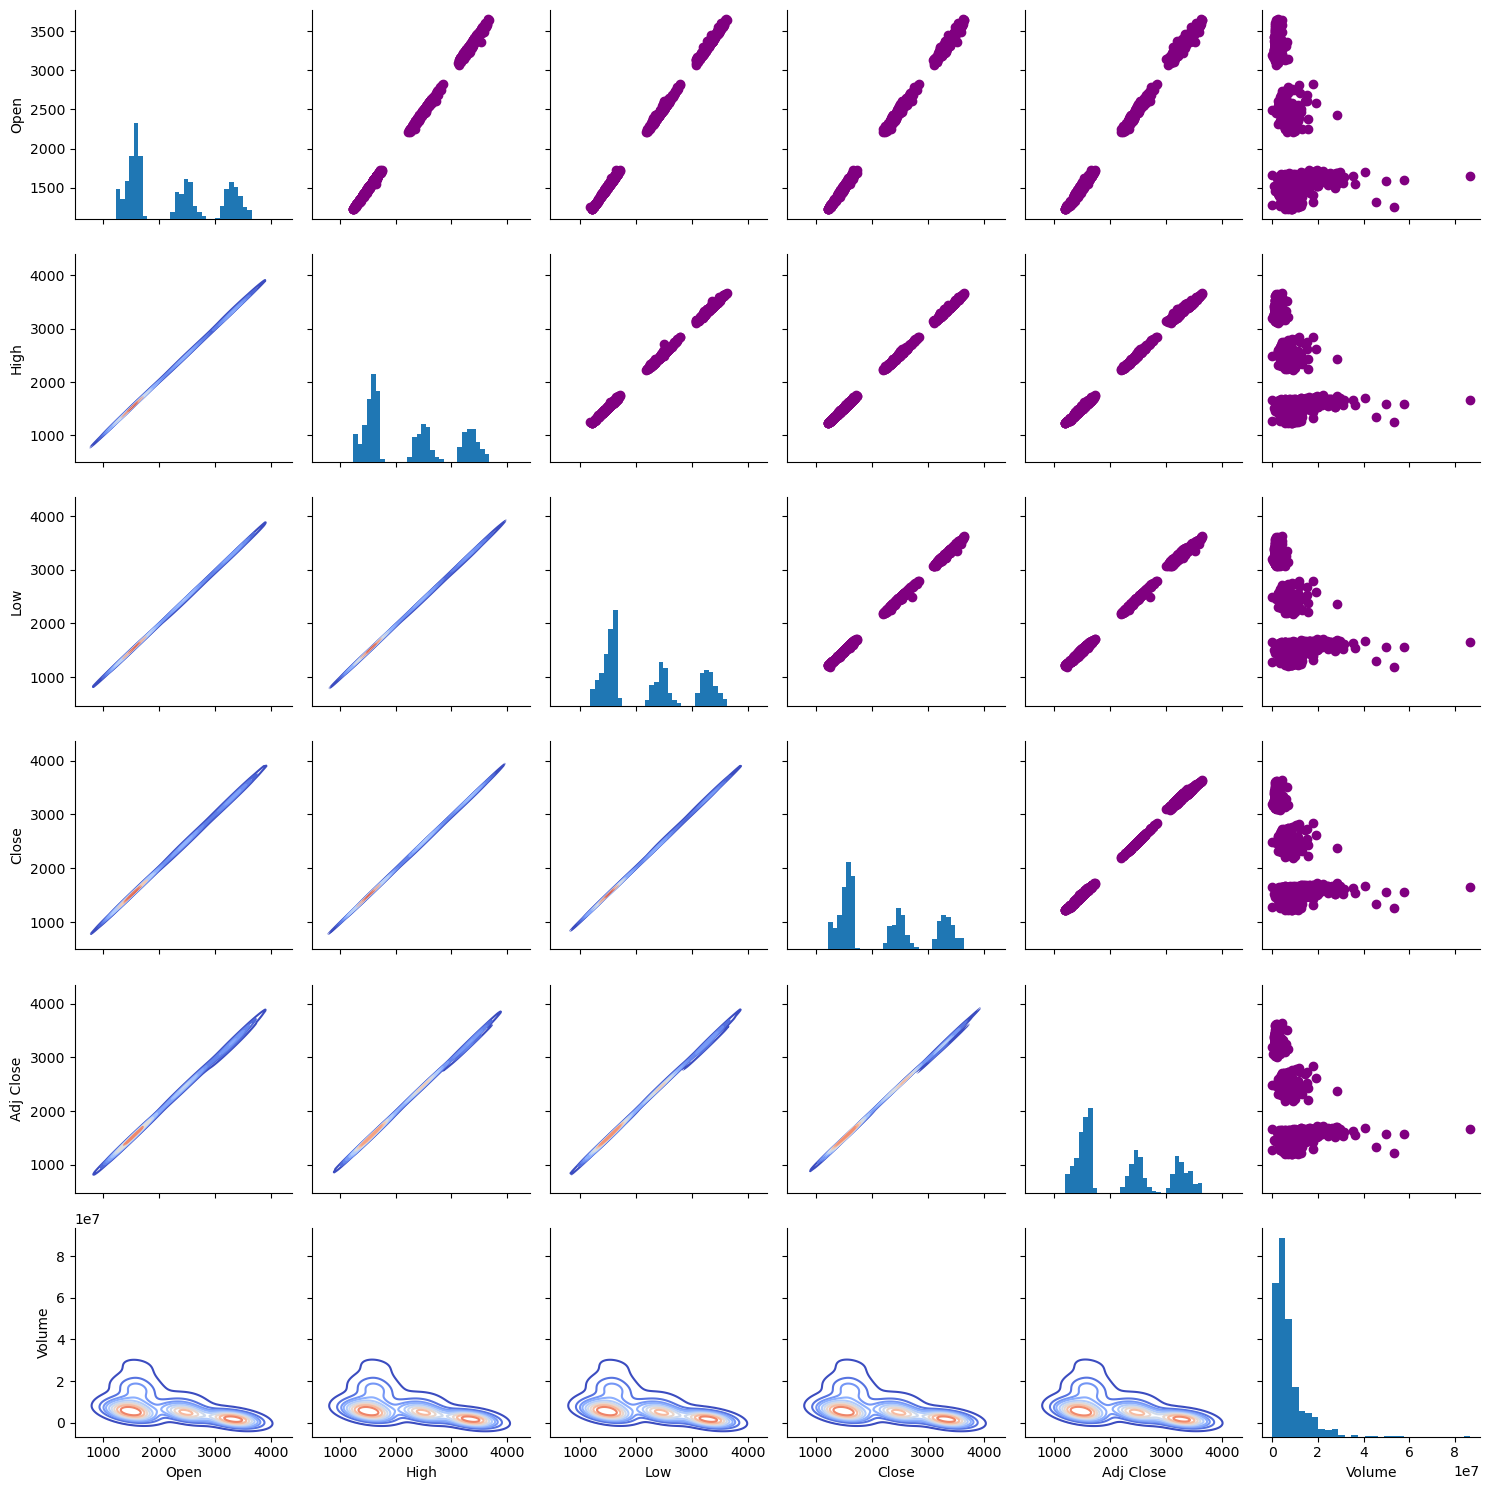

In [16]:
pair_grid = sns.PairGrid(indian_stock_df.dropna())
pair_grid.map_upper(plt.scatter, color='purple')
pair_grid.map_lower(sns.kdeplot, cmap='coolwarm')
pair_grid.map_diag(plt.hist, bins=30)
pair_grid.fig.tight_layout()
plt.show()

C:\Users\piyus\AppData\Local\Temp\ipykernel_9976\1200547271.py:14: UserWarning: The figure layout has changed to tight
  return_fig.fig.tight_layout()


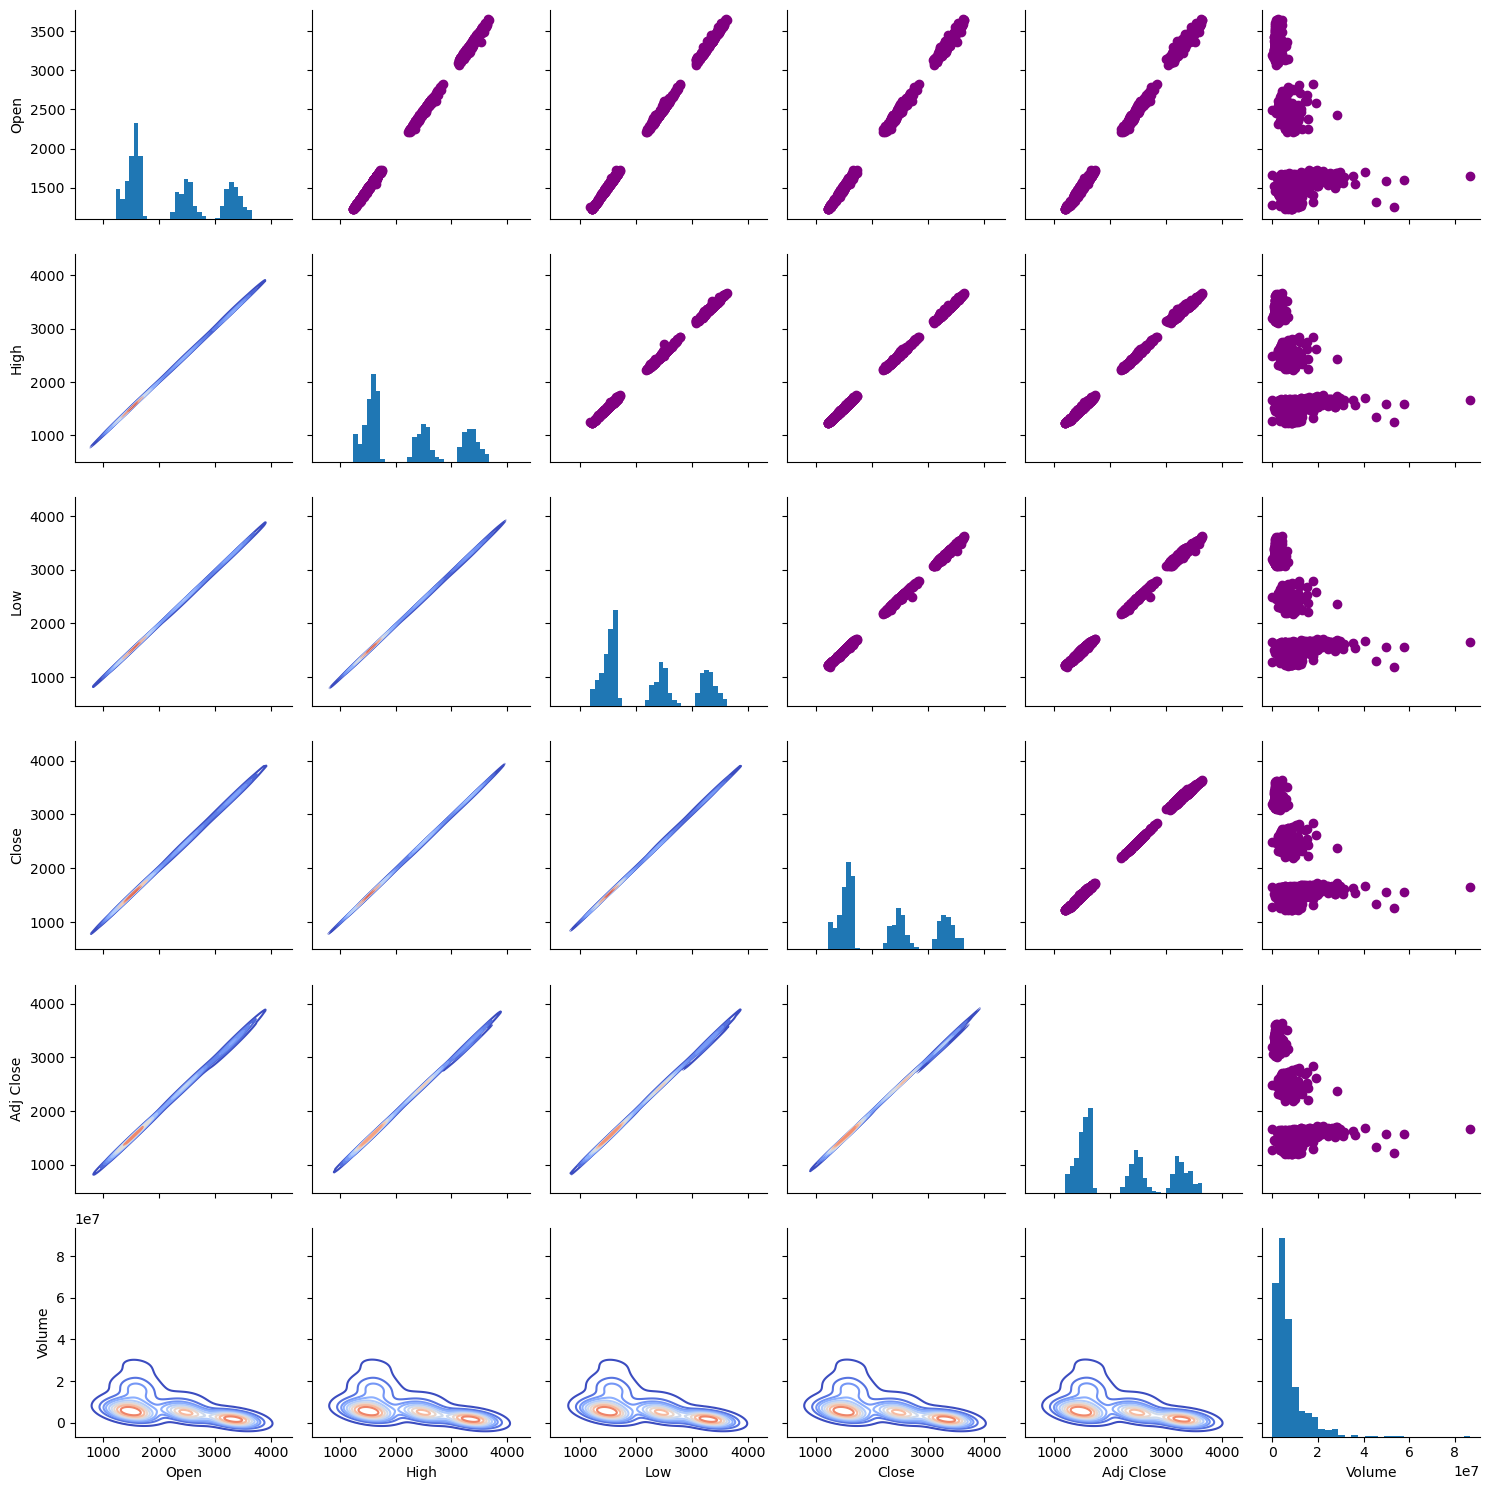

In [17]:
return_fig = sns.PairGrid(indian_stock_df.dropna())
return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='coolwarm')
return_fig.map_diag(plt.hist, bins=30)
return_fig.fig.tight_layout()
plt.show()

In [18]:
#daily returns for each stock
for stock_symbol in indian_stocks:
    stock_data_dict[stock_symbol]['Daily Return'] = stock_data_dict[stock_symbol]['Adj Close'].pct_change()

indian_stock_df = pd.concat(stock_data_dict.values(), axis=0)

print(indian_stock_df.head())


              Open         High          Low        Close    Adj Close  \
Date                                                                     
2022-10-14  2415.0  2416.350098  2369.100098  2370.699951  2362.354980   
2022-10-17  2355.0  2414.000000  2343.600098  2408.750000  2400.271240   
2022-10-18  2422.0  2463.000000  2420.149902  2451.250000  2442.621582   
2022-10-19  2454.5  2527.850098  2441.699951  2493.899902  2485.121338   
2022-10-20  2485.0  2519.000000  2485.000000  2500.600098  2491.797852   

             Volume         Company Name  MA for 10 days  MA for 50 days  \
Date                                                                       
2022-10-14  4202459  Reliance Industries             NaN             NaN   
2022-10-17  7720595  Reliance Industries             NaN             NaN   
2022-10-18  5729899  Reliance Industries             NaN             NaN   
2022-10-19  8882553  Reliance Industries             NaN             NaN   
2022-10-20  4022919  Reli

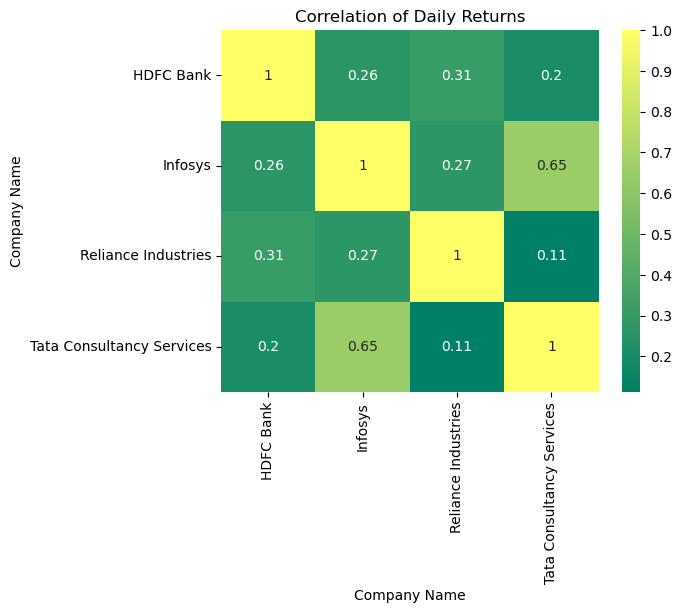

In [19]:
#correlation matrix for daily returns after dropping missing values
correlation_matrix_daily_returns = indian_stock_df.dropna().pivot_table(values='Daily Return', index='Date', columns='Company Name', aggfunc='mean').corr()

plt.figure(figsize=(12, 10))

#Correlation of stock return
plt.subplot(2, 2, 1)
sns.heatmap(correlation_matrix_daily_returns, annot=True, cmap='summer')
plt.title('Correlation of Daily Returns')

plt.tight_layout()
plt.show()


In [20]:
import yfinance as yf
from datetime import datetime

#stock quote for TCS from January 1, 2012, to the current date
df = yf.download('TCS', start='2012-01-01', end=datetime.now())

print(df)


[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2013-11-01  35.000000  37.000000  32.099998  36.200001  33.839130  14667600
2013-11-04  36.799999  36.799999  34.689999  35.349998  33.044563   1586600
2013-11-05  35.110001  35.500000  34.820000  35.349998  33.044563    337700
2013-11-06  35.610001  36.490002  35.610001  35.900002  33.558697    549600
2013-11-07  36.799999  36.799999  34.119999  35.310001  33.007175    883700
...               ...        ...        ...        ...        ...       ...
2023-10-09   2.050000   2.080000   1.970000   2.020000   2.020000    299100
2023-10-10   2.020000   2.160000   2.000000   2.100000   2.100000    269200
2023-10-11   2.110000   2.170000   2.020000   2.050000   2.050000    190900
2023-10-12   2.070000   2.080000   1.960000   2.010000   2.010000    240600
2023-10-13   2.0100

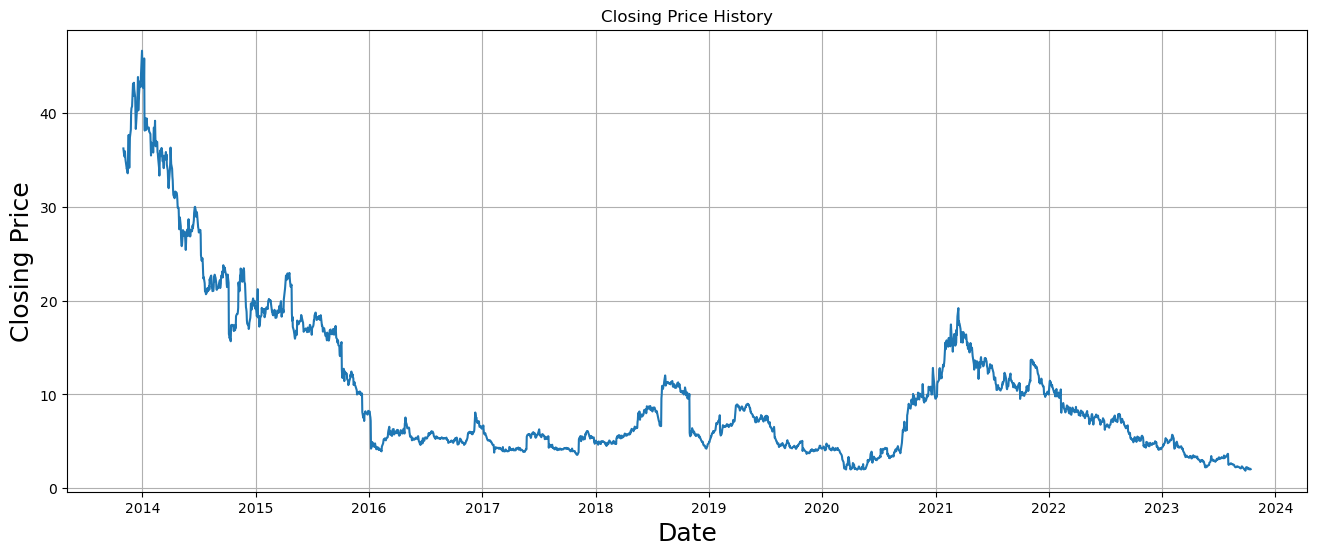

In [21]:
plt.figure(figsize=(16, 6))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price', fontsize=18)
plt.grid(True)
plt.show()

In [22]:
import numpy as np

#new DataFrame with only the 'Close' column
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * 0.95))

print("Training data length:", training_data_len)


Training data length: 2379


In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data


array([[0.76732231],
       [0.7483236 ],
       [0.7483236 ],
       ...,
       [0.00402324],
       [0.00312919],
       [0.00357622]])

In [24]:
#training data set
train_data = scaled_data[0:int(training_data_len), :]

#number of time steps (sequence length)
time_steps = 60

#lists to store x_train and y_train
x_train = []
y_train = []

#training data sequences
for i in range(time_steps, len(train_data)):
    x_train.append(train_data[i - time_steps:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)

[array([0.76732231, 0.7483236 , 0.7483236 , 0.76061692, 0.74742961,
       0.73938311, 0.72351366, 0.71792582, 0.72150204, 0.71032635,
       0.70809117, 0.79950825, 0.74407688, 0.72127847, 0.74474739,
       0.79324989, 0.81202504, 0.85359859, 0.86298612, 0.86767989,
       0.92132319, 0.92221727, 0.89293695, 0.92378186, 0.90813588,
       0.88913726, 0.84443453, 0.8138131 , 0.8240948 , 0.83795262,
       0.87818505, 0.90590078, 0.9374162 , 0.85784532, 0.88086719,
       0.91662943, 0.92668756, 0.91350025, 0.93093428, 0.98591862,
       1.        , 0.9367456 , 0.9117121 , 0.91886453, 0.98167189,
       0.83012959, 0.80978985, 0.83996424, 0.83191774, 0.811578  ,
       0.83884669, 0.82789449, 0.81604829, 0.81716584, 0.81716584,
       0.80755475, 0.8064372 , 0.80174343, 0.77380423, 0.75055879])]
[0.7811801344878473]

[array([0.76732231, 0.7483236 , 0.7483236 , 0.76061692, 0.74742961,
       0.73938311, 0.72351366, 0.71792582, 0.72150204, 0.71032635,
       0.70809117, 0.79950825, 0.744

In [25]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [26]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=40)

Epoch 1/40
2319/2319 [==============================] - 41s 17ms/step - loss: 0.0010
Epoch 2/40
2319/2319 [==============================] - 40s 17ms/step - loss: 4.2258e-04
Epoch 3/40
2319/2319 [==============================] - 44s 19ms/step - loss: 3.3932e-04
Epoch 4/40
2319/2319 [==============================] - 41s 18ms/step - loss: 3.2883e-04
Epoch 5/40
2319/2319 [==============================] - 39s 17ms/step - loss: 2.8242e-04
Epoch 6/40
2319/2319 [==============================] - 40s 17ms/step - loss: 2.0257e-04
Epoch 7/40
2319/2319 [==============================] - 41s 18ms/step - loss: 2.4154e-04
Epoch 8/40
2319/2319 [==============================] - 42s 18ms/step - loss: 2.3814e-04
Epoch 9/40
2319/2319 [==============================] - 37s 16ms/step - loss: 2.0292e-04
Epoch 10/40
2319/2319 [==============================] - 39s 17ms/step - loss: 2.0546e-04
Epoch 11/40
2319/2319 [==============================] - 41s 18ms/step - loss: 1.9634e-04
Epoch 12/40
2319/2319 [

In [27]:
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))



In [28]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


4/4 [==============================] - 1s 15ms/step


In [29]:
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse


0.17947050276574955

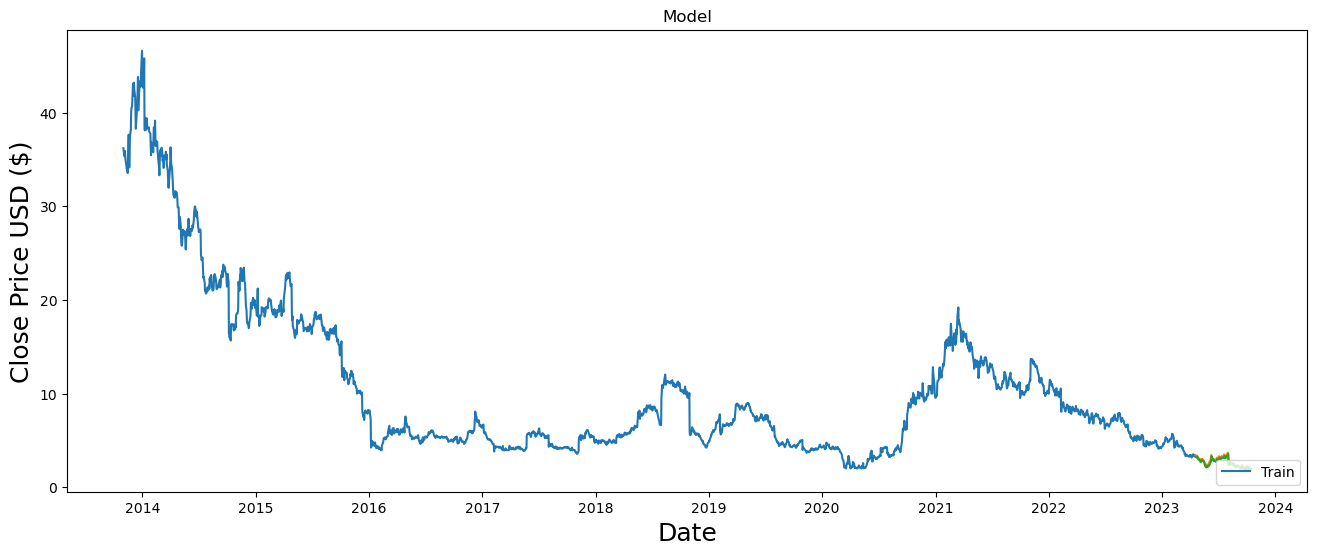

In [39]:
#new DataFrame for predictions
prediction_df = pd.DataFrame(predictions, columns=["Predictions"])

#new index for the 'valid' DataFrame based on the test data
valid_index = data.index[training_data_len : training_data_len + len(predictions)]
valid = data.iloc[training_data_len : training_data_len + len(predictions)].copy()
valid.index = valid_index


if len(predictions) > len(valid):
    predictions = predictions[:len(valid)]
else:
    valid = valid.iloc[:len(predictions)]

valid['Predictions'] = predictions

#Plotting the data
plt.figure(figsize=(16, 6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(data['Close'][:training_data_len], label='Train')
plt.plot(valid.index, valid[['Close', 'Predictions']])
plt.legend(loc='lower right')
plt.show()


In [40]:
valid

,Close,Predictions
Date,,
2023-04-18,3.39,3.253983
2023-04-19,3.39,3.265749
2023-04-20,3.33,3.262982
2023-04-21,3.27,3.206814
2023-04-24,3.37,3.144292
...,...,...
2023-10-09,2.02,1.978906
2023-10-10,2.10,1.910311
2023-10-11,2.05,1.970579
